#Exploração e análise dos dados

In [114]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [115]:
df = pd.read_excel('/content/drive/MyDrive/Data Science/DataSets/Dados.xlsx')

In [116]:
df.head()

,Data,Vendas
0,2022-12-06,870
1,2022-12-07,868
2,2022-12-08,1189
3,2022-12-09,742
4,2022-12-10,317


In [117]:
df.shape

(46, 2)

In [118]:
df.dtypes

Data      datetime64[ns]
Vendas             int64
dtype: object

In [119]:
df.isnull().sum()

Data      0
Vendas    0
dtype: int64

##Atributo vendas

In [120]:
df.describe()

,Vendas
count,46.000000
mean,755.434783
std,430.762201
min,18.000000
25%,346.500000
50%,810.500000
75%,1053.750000
max,1692.000000


In [121]:
import plotly.express as px

In [13]:
px.box(df, y = 'Vendas')

In [122]:
print(np.where(df['Vendas']<319))

(array([ 4, 11, 12, 17, 18, 19, 24, 25, 26, 33, 39]),)


In [125]:
#filtrando dias que são inválidos após analise -> dias de feriado
filtro = df['Vendas'] < 145
df_diasInvalidos = df[filtro]
print(df_diasInvalidos)

         Data  Vendas
17 2022-12-23      18
18 2022-12-24      40
19 2022-12-25      67
24 2022-12-30     106
25 2022-12-31      54
26 2023-01-01     144


In [126]:
diasInvalidos = []
for index, row in df_diasInvalidos.iterrows():
  diasInvalidos.append(index)

In [133]:
filtro2 = df['Vendas'] > 145
df_tratado = df[filtro2]

In [134]:
px.box(df_tratado, y = 'Vendas')

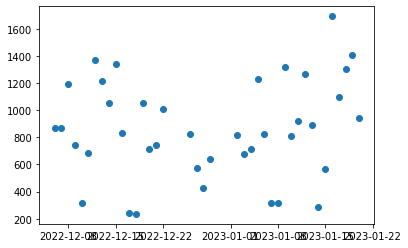

In [135]:
plt.scatter(df_tratado['Data'], df_tratado['Vendas'])
plt.show()

#Calculando as previsões

In [136]:
vendasTerca = []
vendasQuarta = []
vendasSabado = []
vendasDomingo = []
vendasSegunda = []

In [137]:
for index, row in df.iterrows():
  if ((index%7) == 0 and index not in diasInvalidos):
    vendasTerca.append(df['Vendas'].iloc[index])
  if ((index%7) == 1 and index not in diasInvalidos):
    vendasQuarta.append(df['Vendas'].iloc[index])
  if ((index%7) == 4 and index not in diasInvalidos):
    vendasSabado.append(df['Vendas'].iloc[index])
  if ((index%7) == 5 and index not in diasInvalidos):
    vendasDomingo.append(df['Vendas'].iloc[index])
  if ((index%7) == 6 and index not in diasInvalidos):
    vendasSegunda.append(df['Vendas'].iloc[index])

In [138]:
def calcula_media(lista):
  total = 0
  for i in range(len(lista)):
    total = total + lista[i]
  return (total/len(lista)).round()

In [139]:
previsao_21_01 = calcula_media(vendasSabado)
previsao_22_01 = calcula_media(vendasDomingo)
previsao_23_01 = calcula_media(vendasSegunda)
previsao_24_01 = calcula_media(vendasTerca)
previsao_25_01 = calcula_media(vendasQuarta)

In [140]:
print("Previsão de venda dia 21/01/22 :", previsao_21_01)
print("Previsão de venda dia 22/01/22 :", previsao_22_01)
print("Previsão de venda dia 23/01/22 :", previsao_23_01)
print("Previsão de venda dia 24/01/22 :", previsao_24_01)
print("Previsão de venda dia 25/01/22 :", previsao_25_01)

Previsão de venda dia 21/01/22 : 291.0
Previsão de venda dia 22/01/22 : 451.0
Previsão de venda dia 23/01/22 : 1177.0
Previsão de venda dia 24/01/22 : 850.0
Previsão de venda dia 25/01/22 : 862.0
